### Import Necessary Libraries

In [28]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

### Read Dataset

In [2]:
# Read csv from path
df = pd.read_csv(r'**********')

In [3]:
# Checking head
df.head(15)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


### Sanity Check of Data

In [4]:
# Checking shape
df.shape

(2000, 8)

In [5]:
# Checking detail info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [6]:
# Checking null values
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [7]:
# Checking duplicate values
df.duplicated().sum()

np.int64(0)

In [8]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Gender
Female    1186
Male       814
Name: count, dtype: int64
******************************
Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64
******************************


### EDA-Exploratory Data Analysis

In [9]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,2000.0,1000.5000,577.494589,1.0,500.75,1000.5,1500.25,2000.0
Age,2000.0,48.9600,28.429747,0.0,25.00,48.0,73.00,99.0
Annual Income ($),2000.0,110731.8215,45739.536688,0.0,74572.00,110045.0,149092.75,189974.0
Spending Score (1-100),2000.0,50.9625,27.934661,0.0,28.00,50.0,75.00,100.0
Work Experience,2000.0,4.1025,3.922204,0.0,1.00,3.0,7.00,17.0
Family Size,2000.0,3.7685,1.970749,1.0,2.00,4.0,5.00,9.0


In [10]:
df.describe(include="object")

,Gender,Profession
count,2000,1965
unique,2,9
top,Female,Artist
freq,1186,612


In [11]:
df.select_dtypes(include="number").columns

Index(['CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
       'Work Experience', 'Family Size'],
      dtype='object')

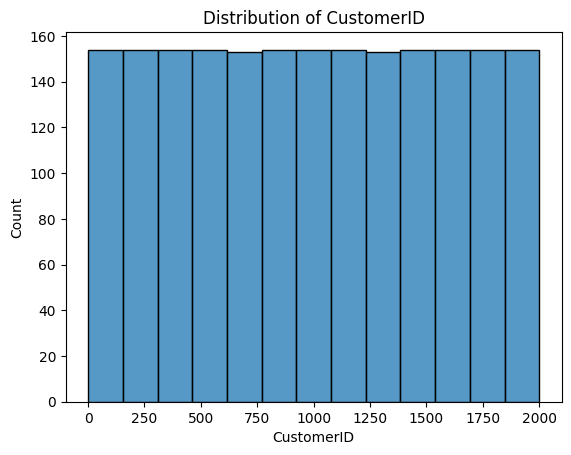

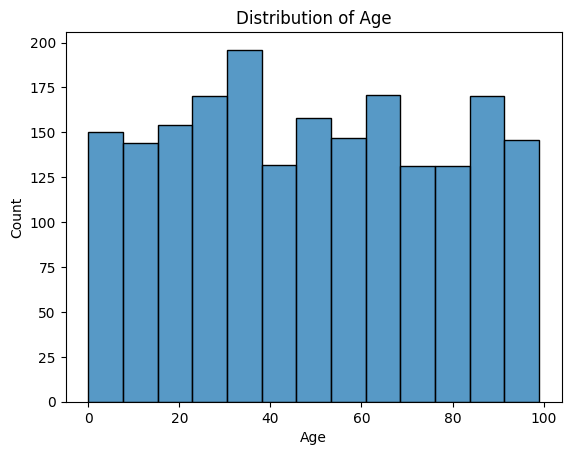

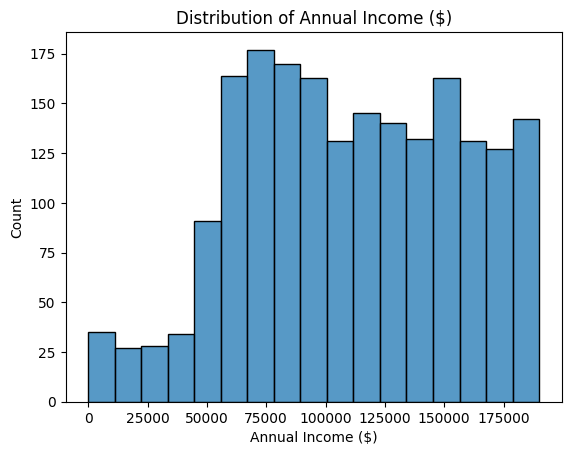

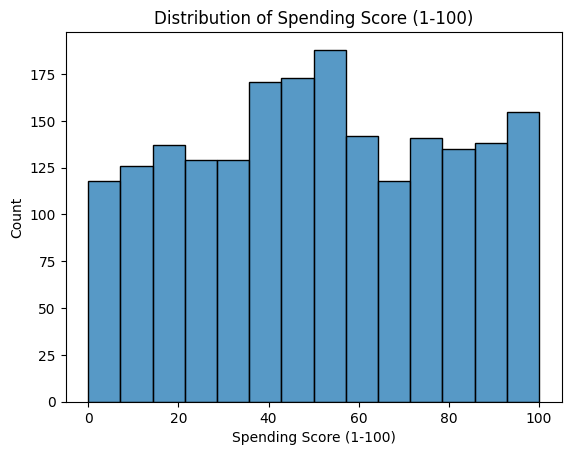

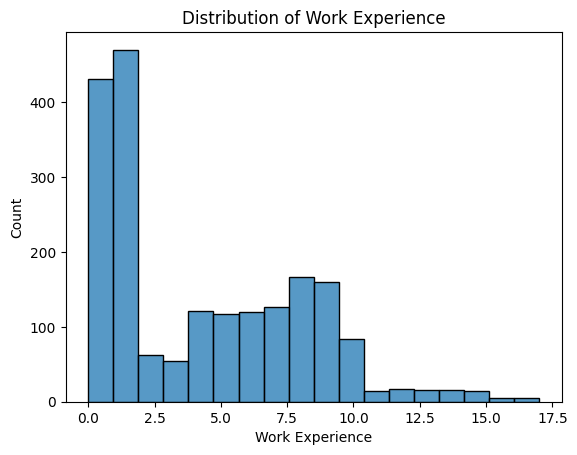

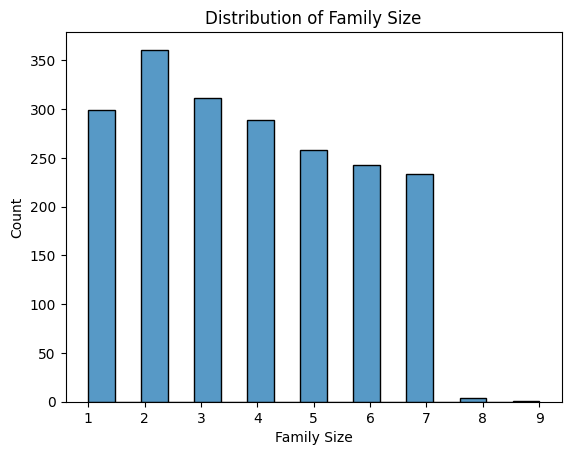

In [12]:
# Histogram to understand distribution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.title(f'Distribution of {i}')  # Title for each plot
    plt.show()  # Display the plot

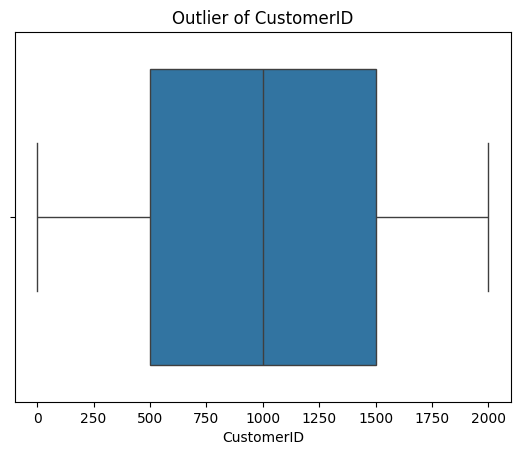

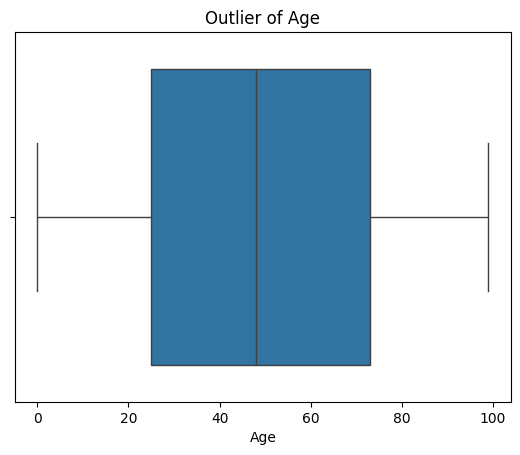

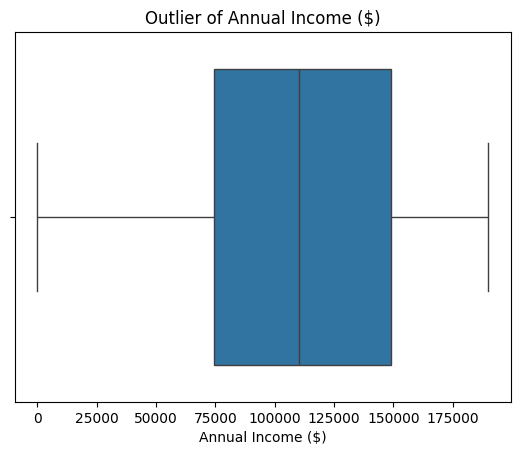

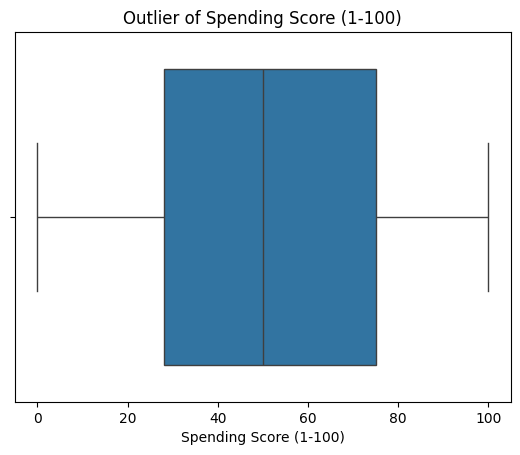

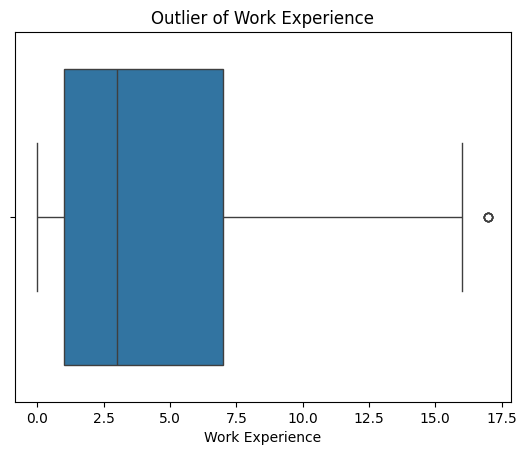

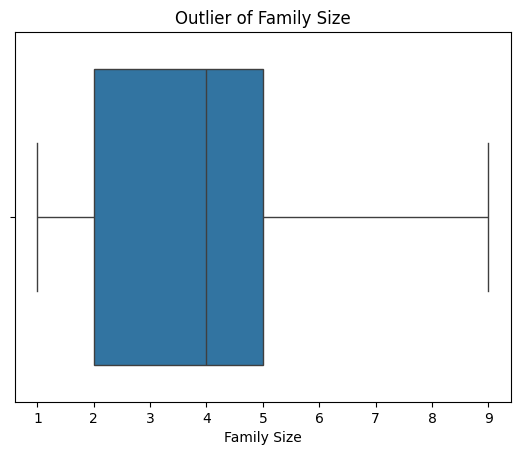

In [13]:
# Boxplot to identify outlier
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.title(f'Outlier of {i}')  # Title for each plot
    plt.show()  # Display the plot

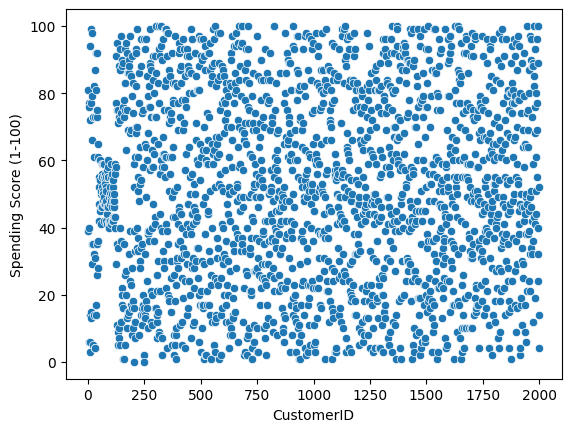

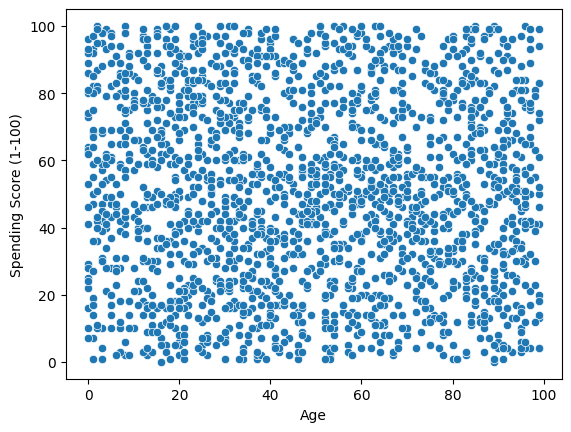

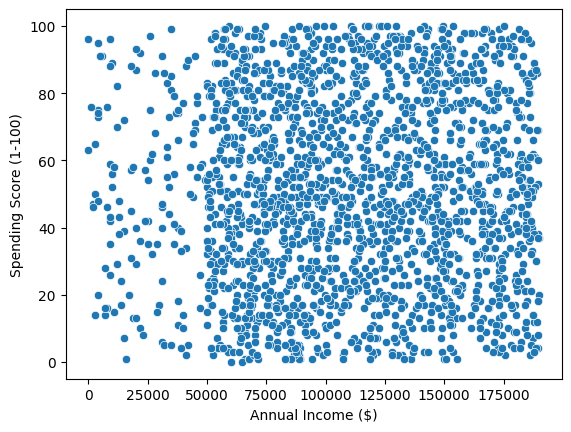

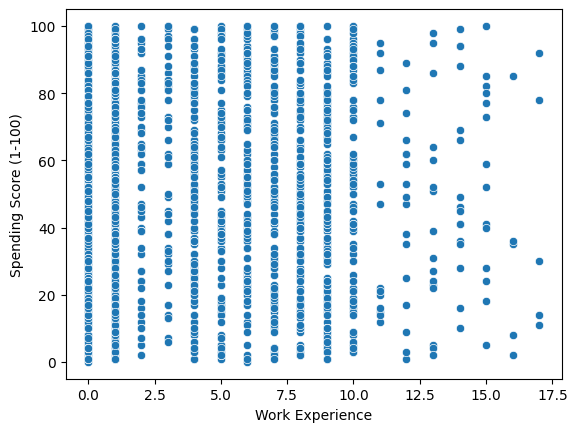

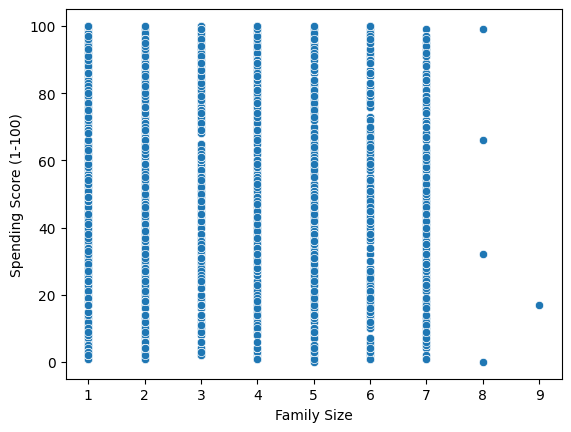

In [15]:
# Scatter plot to understand the relationship
for i in ['CustomerID', 'Age', 'Annual Income ($)', 'Work Experience', 'Family Size']:
    sns.scatterplot(data=df, x=i, y='Spending Score (1-100)')
    plt.show()  # Display the plot

<Axes: >

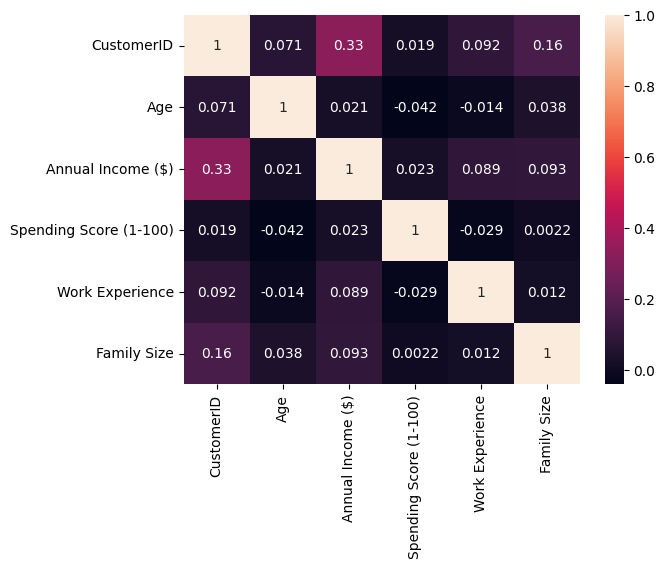

In [16]:
# Correlation with heatmap to interpret the relation and multicolliniarity
sns.heatmap(df.select_dtypes(include="number").corr(), annot = True)

### Missing Value Treatments

In [37]:
# We don't have missing value in numbers type otherwise we can treat missing values through mean, median or KNNInputer
# We have categorical missing data for "Profession", We have doing the treatment through KNN. 
# However we can replace data with mode or we can drop the data as well with value null

# Step 1: Retain the categorical columns that won't be imputed
non_imputed_columns = df[['CustomerID', 'Gender']].copy()

# Step 2: Convert 'Profession' column to numerical using Label Encoding for imputation
le = LabelEncoder()
df['Profession_Encoded'] = le.fit_transform(df['Profession'].astype(str))  # Convert NaN to string 'nan'

# Step 3: Apply KNN Imputer on the numerical columns including encoded 'Profession'
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 
                                                    'Work Experience', 'Family Size', 'Profession_Encoded']]), 
                          columns=['Age', 'Annual Income ($)', 'Spending Score (1-100)', 
                                   'Work Experience', 'Family Size', 'Profession_Encoded'])

# Step 4: Convert the imputed 'Profession_Encoded' column back to categorical 'Profession'
df_imputed['Profession'] = le.inverse_transform(df_imputed['Profession_Encoded'].round().astype(int))

# Step 5: Drop the 'Profession_Encoded' column (since we no longer need the encoded form)
df_imputed.drop(columns=['Profession_Encoded'], inplace=True)

# Step 6: Combine the non-imputed columns ('CustomerID' and 'Gender') back with the imputed DataFrame
final_df = pd.concat([non_imputed_columns, df_imputed], axis=1)

final_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession
0,1,Male,19.0,15000.0,39.0,1.0,4.0,Healthcare
1,2,Male,21.0,35000.0,81.0,3.0,3.0,Engineer
2,3,Female,20.0,86000.0,6.0,1.0,1.0,Engineer
3,4,Female,23.0,59000.0,77.0,0.0,2.0,Lawyer
4,5,Female,31.0,38000.0,40.0,2.0,6.0,Entertainment
5,6,Female,22.0,58000.0,76.0,0.0,2.0,Artist
6,7,Female,35.0,31000.0,6.0,1.0,3.0,Healthcare
7,8,Female,23.0,84000.0,94.0,1.0,3.0,Healthcare
8,9,Male,64.0,97000.0,3.0,0.0,3.0,Engineer
9,10,Female,30.0,98000.0,72.0,1.0,4.0,Artist


### Outliear Treatments

In [17]:
# Not much outlier present in data otherwise we need to find the upper & lower
# whisker and decide to fix outliers

### Duplicate Treatments

In [34]:
# We dont have duplicate data otherwise, we treat through
# df.drop_duplicates()

### Export data in csv

In [38]:
# Export to CSV
final_df.to_csv('customers_preprocessed_data.csv', index=False)